In [1]:
from scipy.stats import norm 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

Parameters are taken from https://github.com/BDI-pathogens/OpenABM-Covid19/blob/master/documentation/parameters/parameter_dictionary.md

Mean length until recovery from intensive care is given as 18.8 days with a standard deviation of 12.21 from a personal communication with researchers.

The normal distribution with this specification has over 5% of its probability mass below zero.

In [6]:
mean = 18.8
std = 12.21
var = std ** 2

print(mean, std)

18.8 12.21


0.98

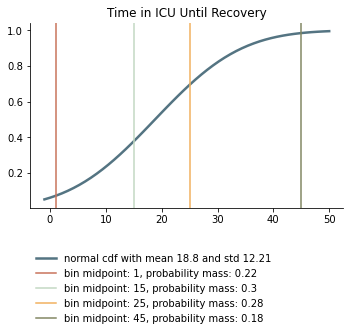

In [18]:
xs = np.linspace(-1, 50)
# cdf_func = partial(norm.cdf, loc=mean, scale=std)
cdf_func = partial(norm.cdf, loc=mean, scale=std)
cdf_ys = cdf_func(x=xs)

def midpoint_with_p_mass(upper, lower=None, color="blue"):
    old_cdf = 0 if lower is None else cdf_func(lower)
    # do not move because cdf_func(5) could be > 0!
    lower = 0 if lower is None else lower
    prob_mass = round(cdf_func(upper) - old_cdf, 2)
    midpoint = round(0.5 * (upper + lower))
    label = f"bin midpoint: {midpoint}, probability mass: {prob_mass}"
    plt.axvline(midpoint, label=label, color=color)
    return prob_mass

fig, ax = plt.subplots(figsize=(5,5))
sns.lineplot(
    xs, cdf_ys, 
    label=f"normal cdf with mean {mean} and std {std}",     
    color="#547482", linewidth=2.5)
p1 = midpoint_with_p_mass(10, -8, color="#C87259")
p2 = midpoint_with_p_mass(20, 10, color="#C2D8C2")
p3 = midpoint_with_p_mass(30, 20, color="#F1B05D")
p4 = midpoint_with_p_mass(60, 30, color="#818662")
lgd = plt.legend(frameon=False, bbox_to_anchor=(0.8, -0.2))
plt.title('Time in ICU Until Recovery')
sns.despine()
plt.tight_layout()
plt.savefig(
    'time_until_icu_recovery.png', bbox_inches='tight', bbox_extra_artists=(lgd,))

p1+p2+p3+p4

In [87]:
pct_die = 0.12
pct_survive = 1 - pct_die
survive_shares = pct_survive * np.array([p1, p2, p3, p4])
print(survive_shares.round(2), pct_die + survive_shares.sum())

[0.36 0.19 0.26 0.06] 0.9912


In [12]:
# probability mass below 0
cdf_func(0.0)

0.061814122042121306